<a href="https://colab.research.google.com/github/stevebak4/Data-mining/blob/main/data_mining_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Τεχνικές Εξόρυξης Δεδομένων**
#**Εργασία 2**
Στέφανος Μπακλαβάς 1115201700093

Γιώργος Γαλάνης 1115201800024

In [ ]:
# Χρησιμοποιώντας την εντολή import, εισάγετε τις προαναφερθείσες βιβλιοθήκες
# Αν δεν είναι εγκατεστημένες μπορείτε να χρησιμοποιήσετε την εντολή: !pip install <module1> <module2> ...
# για να την εγκαταστήσετε.
# Συνίσταται να ορίσετε local names (pd για το pandas, plt για το matplotlib.pyplot και sns για το seaborn)

from google.colab import drive
drive.mount("/content/drive")

import nltk
nltk.download('stopwords')
!pip install --upgrade gensim
!pip install python-Levenshtein



!pip install beautifulsoup4
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
from datetime import datetime

from bs4 import BeautifulSoup

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.naive_bayes import MultinomialNB



from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler


import gensim.downloader as api

# download the pretrained embeddings
glove_vectors = api.load("glove-wiki-gigaword-100")
#cn_vectors = api.load("conceptnet-numberbatch-17-06-300")
#pre_ft_vectors = api.load('fasttext-wiki-news-subwords-300')
#glove_vectors = api.load('glove-twitter-25')

# Χρησιμοπoείται για inline plotting
%matplotlib inline


# opening csv

true_path = r'/content/drive/MyDrive/Colab Notebooks/data_mining_hw2/True.csv'
true = pd.read_csv(true_path)
fake_path = r'/content/drive/MyDrive/Colab Notebooks/data_mining_hw2/Fake.csv'
fake = pd.read_csv(fake_path)

MessageError: ignored

# **Ερώτημα 1:**
Παρακάτω αρχικά αφαιρούνται όσες γραμμές έχουν κάποιο κενό χαρακτηριστικό.Επίσης από κάθε στήλη αφαιρούνται τα σημεία στίξης , οι παύλες , ενώ αντικαθίστανται και οι συνεχόμενοι λευκοί χαρακτήρες με έναν.

In [ ]:

#drop null rows

true = true.dropna(subset=['title'])
true = true.dropna(subset=['subject'])
true = true.dropna(subset=['text'])
true = true.dropna(subset=['date'])
true = true.reset_index(drop=True)

fake = fake.dropna(subset=['title'])
fake = fake.dropna(subset=['subject'])
fake = fake.dropna(subset=['text'])
fake = fake.dropna(subset=['date'])
fake = fake.reset_index(drop=True)



true['date'] = true['date'].str.translate({ord(i): " " for i in ',–''-‘"":.!?'})
true['subject'] = true['subject'].str.translate({ord(i): " " for i in ':–''-‘,.!?'})
true['title'] = true['title'].str.translate({ord(i): " " for i in '-‘–'':,.!?'})
true['text'] = true['text'].str.translate({ord(i): " " for i in ',:–''-‘.!?'})

fake['date'] = fake['date'].str.translate({ord(i): " " for i in ',:-‘–''"".!?'})
fake['subject'] = fake['subject'].str.translate({ord(i): " " for i in ':–''-‘,.!?'})
fake['title'] = fake['title'].str.translate({ord(i): " " for i in ':–''-‘,.!?'})
fake['text'] = fake['text'].str.translate({ord(i): " " for i in ':-‘,–''.!?'})

fake.columns = fake.columns.str.replace('  ', ' ')


true['date'] = true['date'].replace("–"," ")
true['subject'] = true['subject'].replace("–"," ")
true['title'] = true['title'].replace("–"," ")
true['text'] = true['text'].replace("–"," ")

fake['date'] = fake['date'].replace("–"," ")
fake['subject'] = fake['subject'].replace("–"," ")
fake['title'] = fake['title'].replace("–"," ")
fake['text'] = fake['text'].replace("–"," ")

fake.columns = fake.columns.str.replace('  ', ' ')
true.columns = true.columns.str.replace('  ', ' ')

fake['text'] = fake['text'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')
fake['date'] = fake['date'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')
fake['subject'] = fake['subject'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')
fake['title'] = fake['title'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')


true['text'] = true['text'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')
true['date'] = true['date'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')
true['subject'] = true['subject'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')
true['title'] = true['title'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')







# **Ερώτημα 2.α, True:**
Παρακάτω βρίσκουμε και παρουσιάζουμε τα πιο συχνά διγράμματα των τίτλων των αληθινών ειδήσεων.O λόγος που επιλέγονται τα διγράμματα είναι το ότι έχουμε έτσι μία καλύτερη ιδέα για το περιεχόμενο των θεμάτων αφού με τα μονογράμματα υπήρχε αρκετή επανάληψη πληροφορίας και απόκρυψη σημαντικών θεμάτων

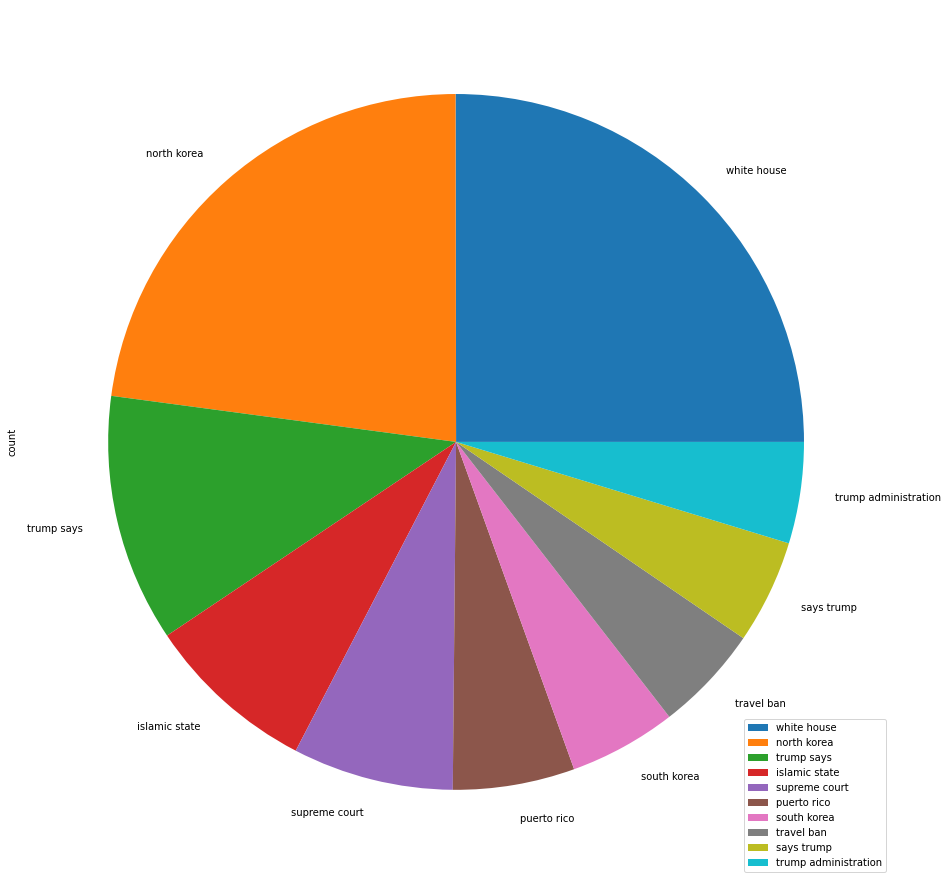

In [ ]:



bow_vectorizer = CountVectorizer(ngram_range=(2,2),max_df=1.0, min_df=1 ,dtype=bool,max_features=100,stop_words='english')
bow = bow_vectorizer.fit_transform(true['title'])
bow_arr = bow.toarray()
bow_names = bow_vectorizer.get_feature_names()
df = pd.DataFrame(bow_arr, columns=bow_vectorizer.get_feature_names(),index=true['title'])

df1 = df.sum(axis=0)

df1 = df1.to_frame()
df1 = df1.rename(columns={0: "count"})

df1 = df1.sort_values(df1.columns[0], ascending = False)
df1 = df1[:10]
df1


plot = df1.plot.pie(y='count',figsize=(16,16))




# **Ερώτημα 2.α, False:**

Παρακάτω βρίσκουμε και παρουσιάζουμε τα πιο συχνά διγράμματα των τίτλων των ψευδών ειδήσεων.O λόγος που επιλέγονται τα διγράμματα είναι το ότι έχουμε έτσι μία καλύτερη ιδέα για το περιεχόμενο των θεμάτων αφού με τα μονογράμματα υπήρχε αρκετή επανάληψη πληροφορίας και απόκρυψη σημαντικών θεμάτων.

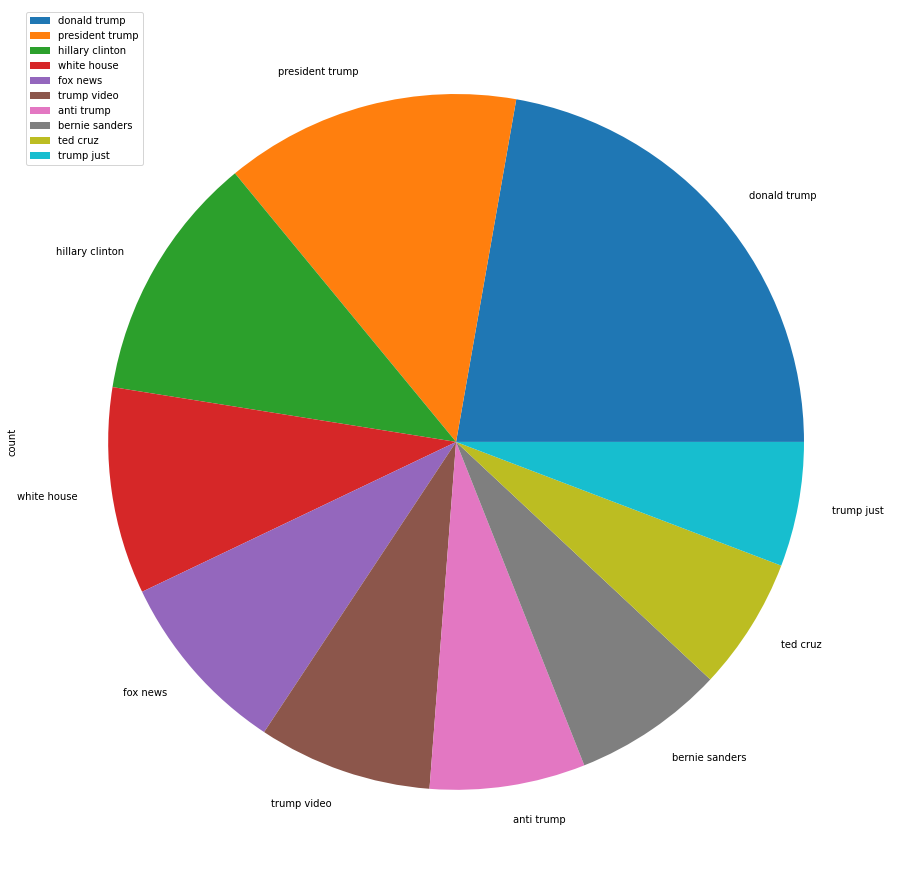

In [ ]:
bow_vectorizer = CountVectorizer(ngram_range=(2,2),max_df=1.0, min_df=1 ,dtype=bool,max_features=100,stop_words='english')
bow = bow_vectorizer.fit_transform(fake['title'])
bow_arr = bow.toarray()
bow_names = bow_vectorizer.get_feature_names()
df = pd.DataFrame(bow_arr, columns=bow_vectorizer.get_feature_names(),index=fake['title'])

df1 = df.sum(axis=0)

df1 = df1.to_frame()
#df = pd.DataFrame(df1, columns=['Name', 'M-cap'])
df1 = df1.rename(columns={0: "count"})

df1 = df1.sort_values(df1.columns[0], ascending = False)
df1 = df1[:10]
df1


plot = df1.plot.pie(y='count',figsize=(16,16))


# **Ερώτημα 2.β titles:**
Παρακάτω παρουσιάζεται διάγραμμα με τον μέσο όρο χαρακτήρων στους τίτλους των αληθινών και των ψευδών ειδήσεων

53.88425082878088
78.13185128401686


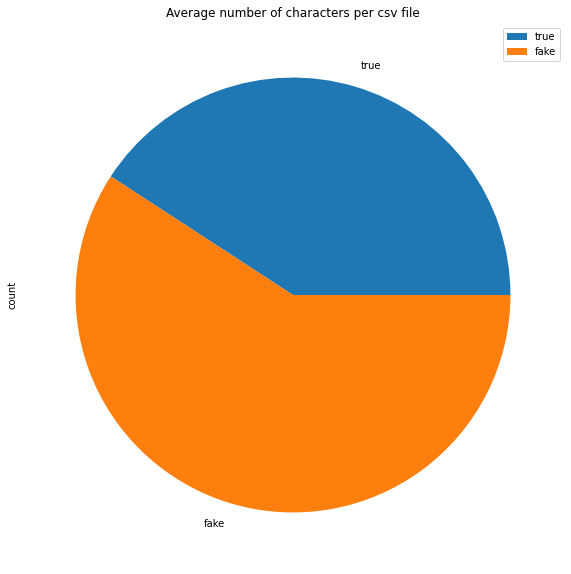

In [ ]:
df1 = pd.DataFrame(columns = ['title', 'count'])
df1['title'] = true['title']
df1['title'] = df1['title'].str.replace(" ","")
df1['count'] = df1['title'].str.len()
strue = df1['count'].sum(axis=0)
count_row1 = df1.shape[0]
strue = strue/count_row1

df2 = pd.DataFrame(columns = ['title', 'count'])
df2['title'] = fake['title']
df2['title'] = df2['title'].str.replace(" ","")
df2['count'] = df2['title'].str.len()
sfake = df2['count'].sum(axis=0)
count_row2 = df2.shape[0]
sfake = sfake/count_row2

df = pd.DataFrame(columns = ['data', 'count'],index=['true','fake'])
df['data'] = ['true','false']
df['count'] = [strue,sfake]

plot =  df.plot.pie(y='count',figsize=(10,10),title='Average number of characters per csv file')
print(strue)
print(sfake)

# **Ερώτημα 2.β text:**
Παρακάτω παρουσιάζεται διάγραμμα με τον μέσο όρο χαρακτήρων στα κείμενα των αληθινών και των ψευδών ειδήσεων

1753.4243004982752
2041.0460372215834


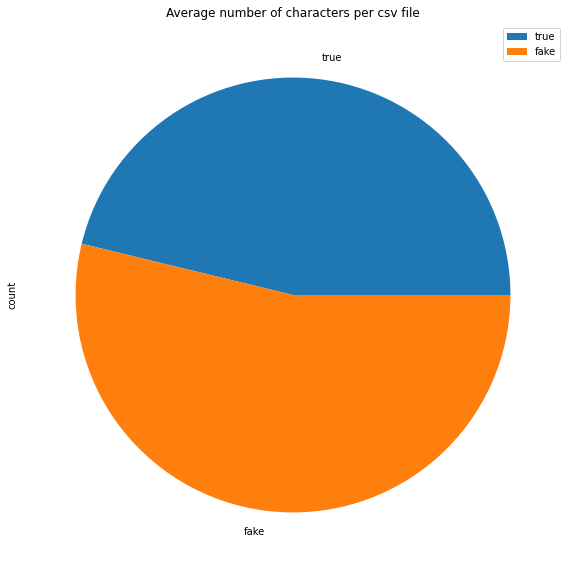

In [ ]:
df3 = pd.DataFrame(columns = ['text', 'count'])
df3['text'] = true['text']
df3['text'] = df3['text'].str.replace(" ","")
df3['count'] = df3['text'].str.len()
strue = df3['count'].sum(axis=0)
count_row1 = df3.shape[0]
strue = strue/count_row2

df4 = pd.DataFrame(columns = ['text', 'count'])
df4['text'] = fake['text']
df4['text'] = df4['text'].str.replace(" ","")
df4['count'] = df4['text'].str.len()
sfake = df4['count'].sum(axis=0)
count_row2 = df4.shape[0]
sfake = sfake/count_row2

df = pd.DataFrame(columns = ['data', 'count'],index=['true','fake'])
df['data'] = ['true','false']
df['count'] = [strue,sfake]

plot =  df.plot.pie(y='count',figsize=(10,10),title='Average number of characters per csv file')
print(strue)
print(sfake)

# **Ερώτημα 2.γ true:**
Παρακάτω παρουσιάζεται διάγραμμα με τον συνολικό αριθμό των λέξεων στα κείμενα και στους τίτλους των αληθινών ειδήσεων

Text(0.5, 1.0, 'Values must be multiplied by 10^2')

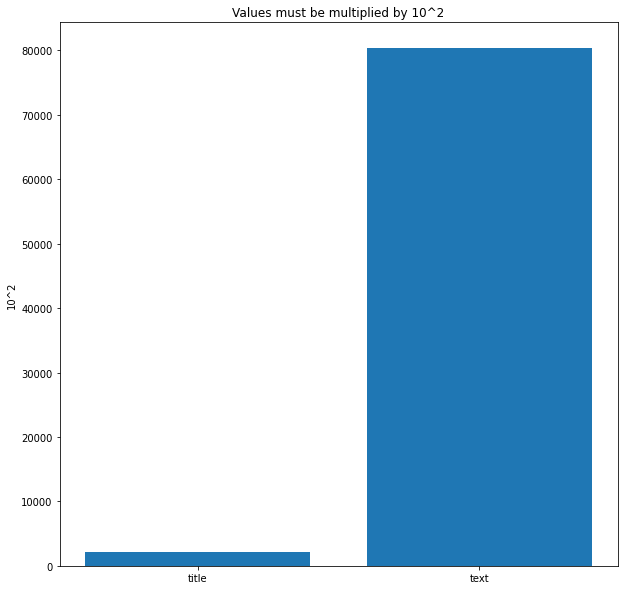

In [ ]:
df = true[['title','text']]

from collections import Counter
results1 = Counter()
results2 = Counter()

df['title'].str.lower().str.split().apply(results1.update)
df['text'].str.lower().str.split().apply(results2.update)


counter1 = 0
counter2 = 0
for item in results1.items():
  counter1 = counter1 + item[1]

for item in results2.items():
  counter2 = counter2 + item[1]


counter1 = counter1 /100
counter2 = counter2 / 100
wc = []
wl = []
wc.append(counter1)
wc.append(counter2)

wl.append('title')
wl.append('text')


fig = plt.figure(figsize=(10,10))

plt.bar(wl,wc)
plt.ylabel("10^2")
plt.title("Values must be multiplied by 10^2")




# **Ερώτημα 2.γ fake:**
Παρακάτω παρουσιάζεται διάγραμμα με τον συνολικό αριθμό των λέξεων στα κείμενα και στους τίτλους των ψευδών ειδήσεων

Text(0.5, 1.0, 'Values must be multiplied by 10^2')

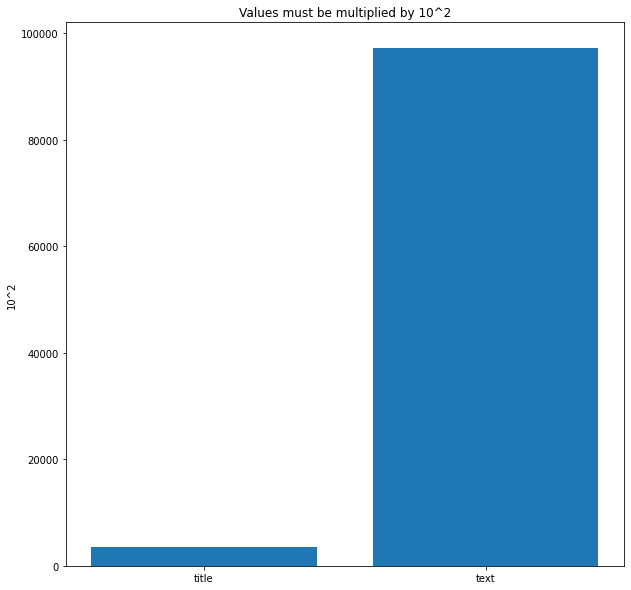

In [ ]:
df = fake[['title','text']]
df
from collections import Counter
results1 = Counter()
results2 = Counter()

df['title'].str.lower().str.split().apply(results1.update)
df['text'].str.lower().str.split().apply(results2.update)

counter1 = 0
counter2 = 0
for item in results1.items():
  counter1 = counter1 + item[1]

for item in results2.items():
  counter2 = counter2 + item[1]

counter1 = counter1 /100
counter2 = counter2 / 100

wc = []
wl = []
wc.append(counter1)
wc.append(counter2)

wl.append('title')
wl.append('text')


fig = plt.figure(figsize=(10,10))

plt.bar(wl,wc)
plt.ylabel("10^2")
plt.title("Values must be multiplied by 10^2")



# **Ερώτημα 2.d true:**
Παρακάτω παρουσιάζεται διάγραμμα με τον συνολικό αριθμό των λέξεων στα κείμενα και στους τίτλους των αληθινών ειδήσεων έχοντας αφαιρέσει και τα stopwords

Text(0.5, 1.0, 'Values must be multiplied by 10^2')

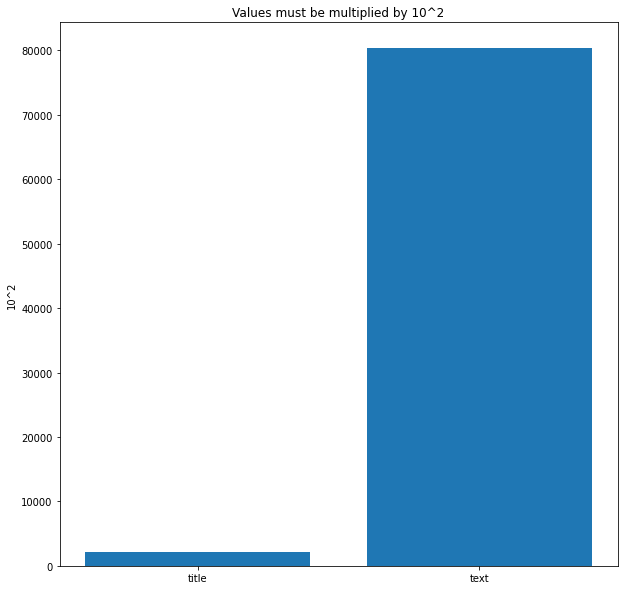

In [ ]:
df = true[['title','text']]
from collections import Counter

from nltk.corpus import stopwords

stop = stopwords.words('english')

df['title'].apply(lambda x: [item for item in x if item not in stop])
df['text'].apply(lambda x: [item for item in x if item not in stop])

results1 = Counter()
results2 = Counter()

df['title'].str.lower().str.split().apply(results1.update)
df['text'].str.lower().str.split().apply(results2.update)

counter1 = 0
counter2 = 0
for item in results1.items():
  counter1 = counter1 + item[1]

for item in results2.items():
  counter2 = counter2 + item[1]

counter1 = counter1 /100
counter2 = counter2 / 100

wc = []
wl = []
wc.append(counter1)
wc.append(counter2)

wl.append('title')
wl.append('text')


fig = plt.figure(figsize=(10,10))

plt.bar(wl,wc)
plt.ylabel("10^2")
plt.title("Values must be multiplied by 10^2")





# **Ερώτημα 2.d fake:**
Παρακάτω παρουσιάζεται διάγραμμα με τον συνολικό αριθμό των λέξεων στα κείμενα και στους τίτλους των ψευδών ειδήσεων έχοντας αφαιρέσει και τα stopwords

Text(0.5, 1.0, 'Values must be multiplied by 10^2')

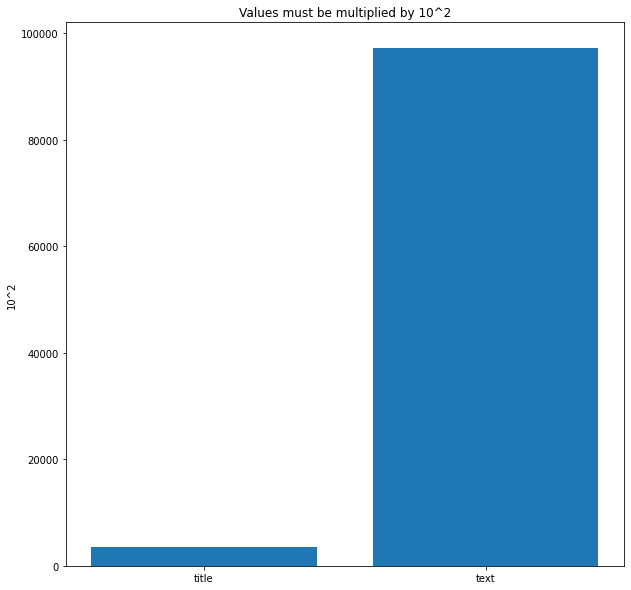

In [ ]:
df = fake[['title','text']]
from collections import Counter

from nltk.corpus import stopwords

stop = stopwords.words('english')

df['title'].apply(lambda x: [item for item in x if item not in stop])
df['text'].apply(lambda x: [item for item in x if item not in stop])




results1 = Counter()
results2 = Counter()

df['title'].str.lower().str.split().apply(results1.update)
df['text'].str.lower().str.split().apply(results2.update)

counter1 = 0
counter2 = 0
for item in results1.items():
  counter1 = counter1 + item[1]

for item in results2.items():
  counter2 = counter2 + item[1]

counter1 = counter1 /100
counter2 = counter2 / 100

wc = []
wl = []
wc.append(counter1)
wc.append(counter2)

wl.append('title')
wl.append('text')


fig = plt.figure(figsize=(10,10))

plt.bar(wl,wc)
plt.ylabel("10^2")
plt.title("Values must be multiplied by 10^2")




# **Ερώτημα 2.ε true:**
Παρακάτω παρουσιάζονται τα 10 πιο συχνά bigrams στους τίτλους και στο κείμενο των άρθρων που αφορούν τις αληθινές ειδήσεις.

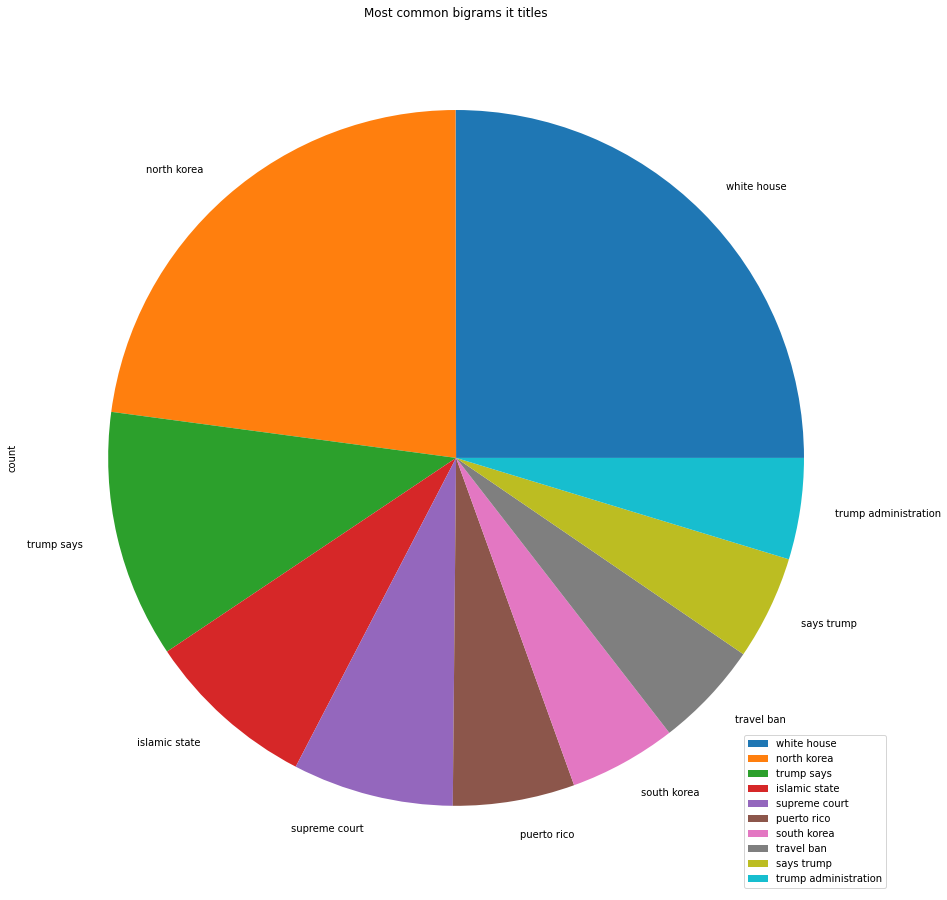

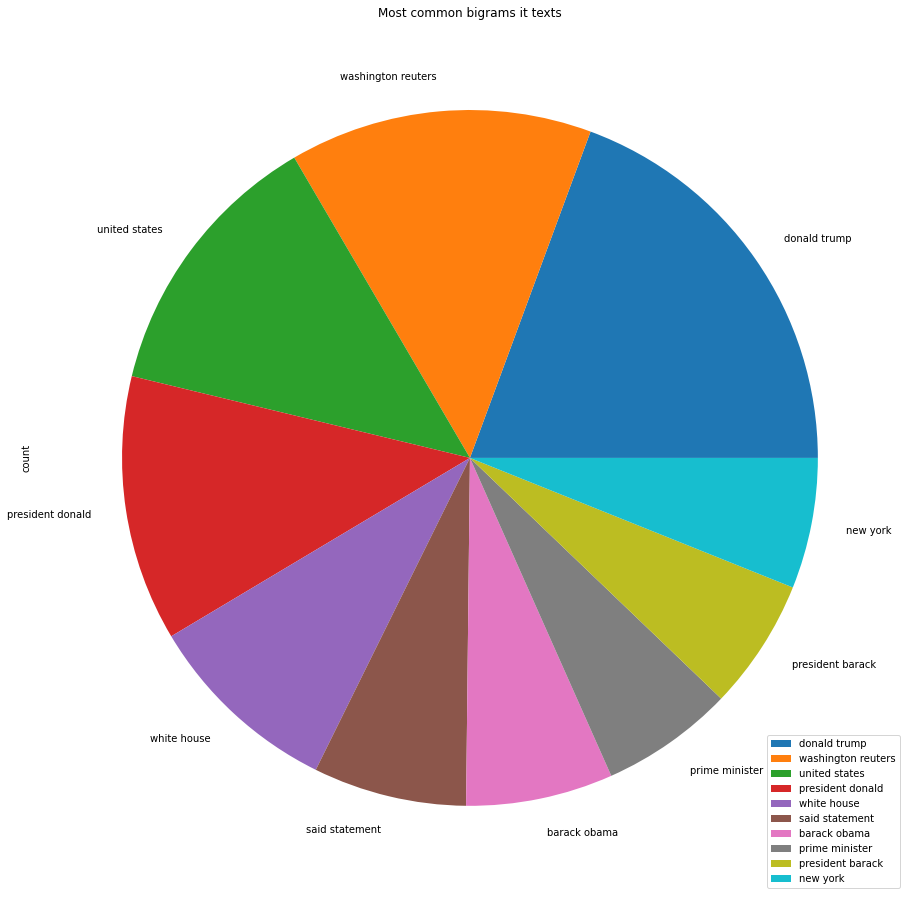

In [ ]:
bow_vectorizer = CountVectorizer(ngram_range=(2,2),max_df=1.0, min_df=1 ,dtype=bool,max_features=100,stop_words='english')
bow = bow_vectorizer.fit_transform(true['title'])
bow_arr = bow.toarray()
bow_names = bow_vectorizer.get_feature_names()
df = pd.DataFrame(bow_arr, columns=bow_vectorizer.get_feature_names(),index=true['title'])

df1 = df.sum(axis=0)

df1 = df1.to_frame()
df1 = df1.rename(columns={0: "count"})

df1 = df1.sort_values(df1.columns[0], ascending = False)
df1 = df1[:10]
df1
#plot titles
plot = df1.plot.pie(y='count',figsize=(16,16),title = "Most common bigrams it titles")

#######################################################
bow_vectorizer = CountVectorizer(ngram_range=(2,2),max_df=1.0, min_df=1 ,dtype=bool,max_features=100,stop_words='english')
bow = bow_vectorizer.fit_transform(true['text'])
bow_arr = bow.toarray()
bow_names = bow_vectorizer.get_feature_names()
df = pd.DataFrame(bow_arr, columns=bow_vectorizer.get_feature_names(),index=true['title'])

df1 = df.sum(axis=0)

df1 = df1.to_frame()
df1 = df1.rename(columns={0: "count"})

df1 = df1.sort_values(df1.columns[0], ascending = False)
df1 = df1[:10]
df1
#plot text
plot = df1.plot.pie(y='count',figsize=(16,16),title = "Most common bigrams it texts")







# **Ερώτημα 2.ε fake:**
Παρακάτω παρουσιάζονται τα 10 πιο συχνά bigrams στους τίτλους και στο κείμενο των άρθρων που αφορούν τις ψευδείς ειδήσεις.

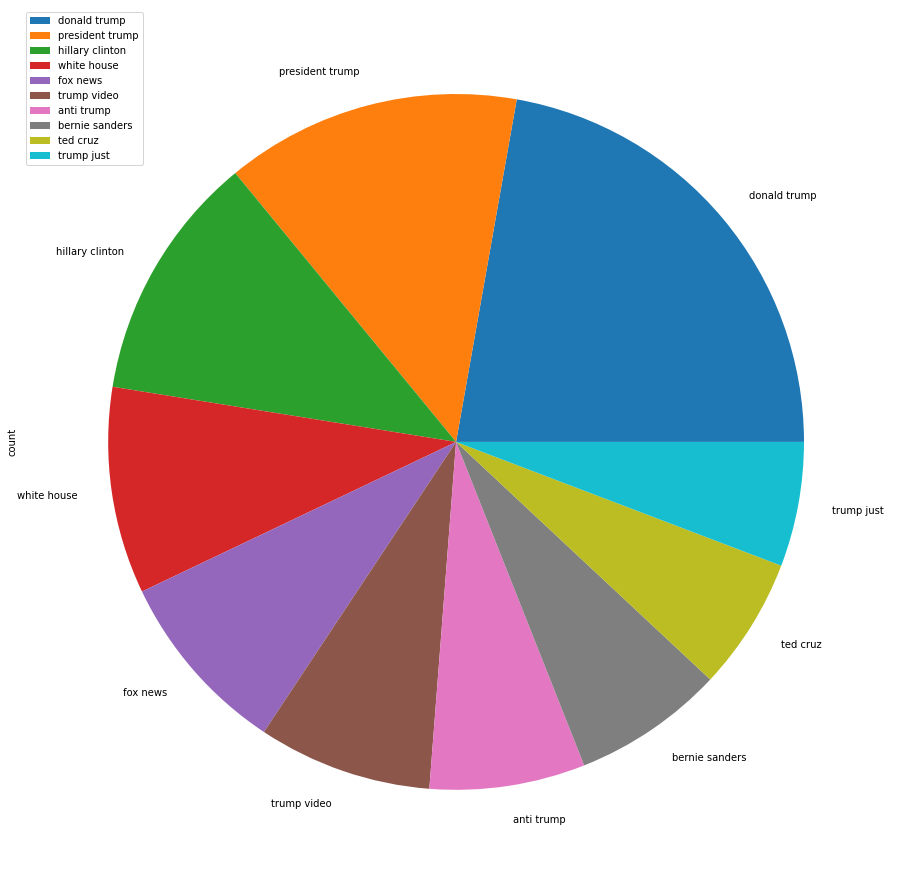

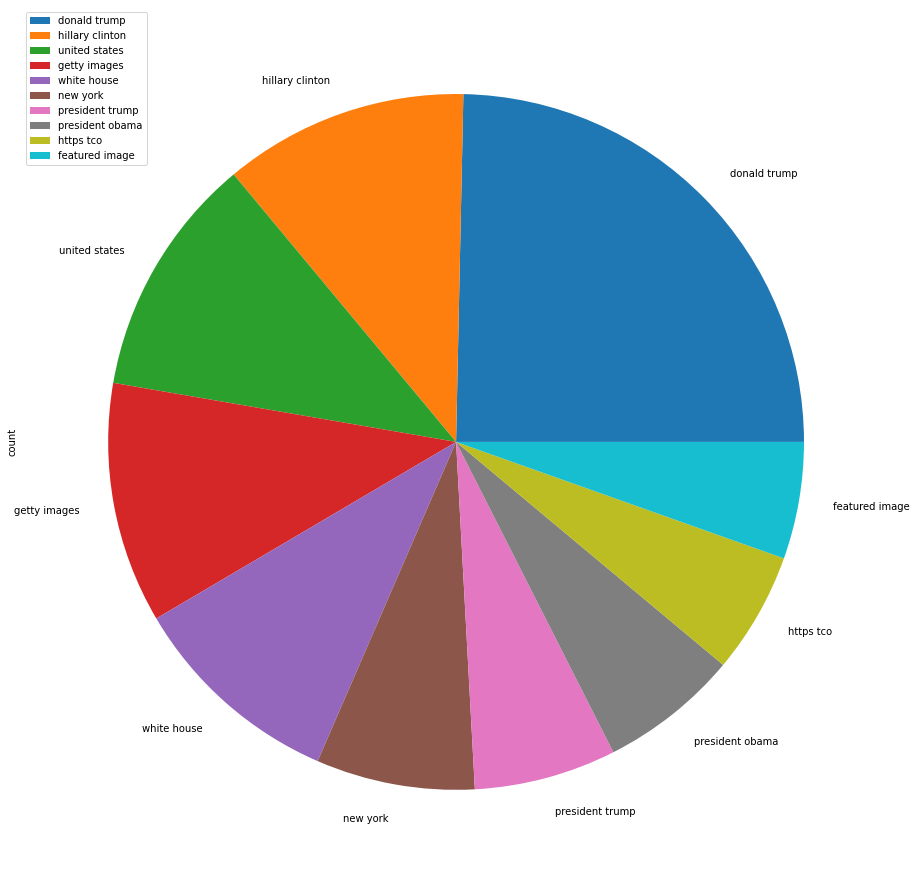

In [ ]:
bow_vectorizer = CountVectorizer(ngram_range=(2,2),max_df=1.0, min_df=1 ,dtype=bool,max_features=100,stop_words='english')
bow = bow_vectorizer.fit_transform(fake['title'])
bow_arr = bow.toarray()
bow_names = bow_vectorizer.get_feature_names()
df = pd.DataFrame(bow_arr, columns=bow_vectorizer.get_feature_names(),index=fake['title'],title = "Most common bigrams it titles")

df1 = df.sum(axis=0)

df1 = df1.to_frame()
df1 = df1.rename(columns={0: "count"})

df1 = df1.sort_values(df1.columns[0], ascending = False)
df1 = df1[:10]

plot = df1.plot.pie(y='count',figsize=(16,16))

#######################################################
bow_vectorizer = CountVectorizer(ngram_range=(2,2),max_df=1.0, min_df=1 ,dtype=bool,max_features=100,stop_words='english')
bow = bow_vectorizer.fit_transform(fake['text'])
bow_arr = bow.toarray()
bow_names = bow_vectorizer.get_feature_names()
df = pd.DataFrame(bow_arr, columns=bow_vectorizer.get_feature_names(),index=fake['title'],title = "Most common bigrams it texts")

df1 = df.sum(axis=0)

df1 = df1.to_frame()
df1 = df1.rename(columns={0: "count"})

df1 = df1.sort_values(df1.columns[0], ascending = False)
df1 = df1[:10]
df1
#plot text
plot = df1.plot.pie(y='count',figsize=(16,16))

# **Ερώτημα 3:**
Παρακάτω δημιουργείται η στήλη των labels η οποία παίρνει τιμή 0 ή 1 και προστίθεται στα dataframe των αληθινών και των ψευδών ειδήσεων. Στην συνέχεια οι εγγραφές ενώνονται και ανακατεύονται δημιουργώντας τα αρχεία test.csv και train.csv με αναλογία 50/50 των αρχικών εγγραφών.


In [ ]:
from sklearn.model_selection import train_test_split

train_fake, test_fake = train_test_split(fake, test_size=0.5,shuffle=False)

test_fake = test_fake.reset_index(drop=True)
train_fake = train_fake.reset_index(drop=True)


zero_label = pd.DataFrame(0,index=np.arange(len(train_fake)), columns= ['label'])
train_fake = pd.concat([train_fake, zero_label], axis=1)

zero_label_2 = pd.DataFrame(0,index=np.arange(len(test_fake)), columns= ['label'])
test_fake = pd.concat([test_fake, zero_label_2], axis=1)


train_true, test_true = train_test_split(true, test_size=0.5,shuffle=False)

test_true = test_true.reset_index(drop=True)
train_true = train_true.reset_index(drop=True)


one_label = pd.DataFrame(1,index=np.arange(len(train_true)), columns= ['label'])
train_true = pd.concat([train_true, one_label], axis=1)

one_label_2 = pd.DataFrame(1,index=np.arange(len(test_true)), columns= ['label'])
test_true = pd.concat([test_true, one_label_2], axis=1)

train = pd.concat([train_fake,train_true], axis=0)

for i in range(0,3):
  train = train.sample(frac=1).reset_index(drop=True)
print(train)

test = pd.concat([test_fake,test_true], axis=0)

for i in range(0,3):
  test = test.sample(frac=1).reset_index(drop=True)
print(test)


train_path = r'/content/drive/MyDrive/Colab Notebooks/data_mining_hw2/train.csv'
train.to_csv(train_path)

test_path = r'/content/drive/MyDrive/Colab Notebooks/data_mining_hw2/test.csv'
test.to_csv(test_path)

                                                   title  ... label
0       John McCain Trump’ Attacks On The Press Are H...  ...     0
1      Icahn tapped as Trump' special adviser on regu...  ...     1
2                     House panel wants Comey recordings  ...     1
3       All The Proof You Need To Realize Hillary Is ...  ...     0
4       In White House Conference Call About Iran Sta...  ...     0
...                                                  ...  ...   ...
22443  Trump to seek probe of secret report he says w...  ...     1
22444  FUNNIEST VIDEO EVER…Sean Spicer Conducts Press...  ...     0
22445      House panel to interview former Trump adviser  ...     1
22446   Trump’ Own Tweets *ck Him As 9th Circuit Cour...  ...     0
22447  Clinton says confident new emails will not cha...  ...     1

[22448 rows x 5 columns]
                                                   title  ... label
0      US Coalition Airstrike on Syrian Army in Al Ta...  ...     0
1       TAKE THE MONEY

# **2.Υλοποίηση Κατηγοριοποίησης:**


# **Αρχικοποιήση**

Παρακάτω ανοίγουμε τα csv αρχεία που δημιουργήθηκαν στο ερώτημα 3 και κάνουμε την αρχικοποίηση των sets και των labels. Χρησιμοποιούνται περίπου τα μισά δεδομένα για λόγο οικονομίας χρόνου εκτέλεσης.

In [ ]:

train_path = r'/content/drive/MyDrive/Colab Notebooks/data_mining_hw2/train.csv'
test_path = r'/content/drive/MyDrive/Colab Notebooks/data_mining_hw2/test.csv'

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

train = train[:10000]
test = test[:10000]

train = train.dropna(subset=['title'])
train = train.dropna(subset=['subject'])
train = train.dropna(subset=['text'])
train = train.dropna(subset=['date'])
train = train.reset_index(drop=True)


test = test.dropna(subset=['title'])
test = test.dropna(subset=['subject'])
test = test.dropna(subset=['text'])
test = test.dropna(subset=['date'])
test = test.reset_index(drop=True)

#############################
X_train = train[['title','text', 'subject','date']]
y_train = train[['label']]
X_test = test[['title','text', 'subject','date']]
y_test = test[['label']]



# **BoW:**
Παρακάτω φτιάχνουμε με την μέθοδο bag_of_words το train και το test set που θα εισάγουμε στις μεθόδους κατηγοριοποίησης  



In [ ]:


X_train1 = X_train
X_test1 = X_test

y_train1 = y_train
y_test1 = y_test

X_train1_text = X_train1[['text']]
X_test1_text = X_test1[['text']]

X_train1_text = X_train1[['text']]
y_train_text = y_train1[['label']]
label_encoder = preprocessing.LabelEncoder()
y_train1 = label_encoder.fit_transform(y_train_text.values[:, 0])

y_test1_text = y_test1[['label']]
y_test1 = label_encoder.transform(y_test1_text.values[:, 0])

count_vect = CountVectorizer()
X_trainB = count_vect.fit_transform(X_train1_text.values[:, 0])
X_testB = count_vect.transform(X_test1_text.values[:,0])

In [ ]:
#Logistic Regression

clf = LogisticRegression(solver='lbfgs', max_iter=100000)
clf.fit(X_trainB, y_train1)

pred=cross_val_predict(clf, X_testB,y_test1, cv=10)
result = clf.score(X_testB, y_test1)
print('Score: ', result)

f1 = f1_score(y_test1, pred,average='weighted')
print('F1 score: ', f1)

accuracy = accuracy_score(y_test1, pred)
print('Accuracy: ', accuracy)

Score:  0.9784
F1 score:  0.9934004902882348
Accuracy:  0.9934


In [ ]:
#Naive Bayes
clf =  MultinomialNB()
clf.fit(X_trainB, y_train1)

pred=cross_val_predict(clf, X_testB,y_test1, cv=10)

result=clf.score(X_testB, y_test1)
print('Score: ', result)

f1 = f1_score(y_test1, pred,average='weighted')
print('F1 score: ', f1)

accuracy = accuracy_score(y_test1, pred)
print('Accuracy: ', accuracy)

Score:  0.8878
F1 score:  0.9627952194441146
Accuracy:  0.9628


In [ ]:
#SVM
#Παρακάτω αξιοποιόντας τη συνάρτηση GridSearchCV περνάμε τις παραμέτρους που αναφέρονται
#στην εκφώνηση και με το best_estimator διαλέγεται ο συνδυασμός που έχει την υψηλότερη απόδοση
#με διαφορετική τημή για την μεταβλητή C το πρόγραμμα δεν έτρεξε

param_grid = {'C': [1.0], 'gamma': ['auto','scale'], 'kernel': ['rbf', 'linear']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
g = grid.fit(X_trainB, y_train1)
clf = g.best_estimator_

pred=cross_val_predict(clf, X_testB,y_test1, cv=10)

result=clf.score(X_testB, y_test1)
print('Score: ', result)

f1 = f1_score(y_test1, pred,average='weighted')
print('F1 score: ', f1)

accuracy = accuracy_score(y_test1, pred)
print('Accuracy: ', accuracy)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=1.0, gamma=auto, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... C=1.0, gamma=auto, kernel=rbf, total= 1.6min
[CV] C=1.0, gamma=auto, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min remaining:    0.0s


[CV] .................... C=1.0, gamma=auto, kernel=rbf, total= 1.5min
[CV] C=1.0, gamma=auto, kernel=rbf ...................................
[CV] .................... C=1.0, gamma=auto, kernel=rbf, total= 1.5min
[CV] C=1.0, gamma=auto, kernel=rbf ...................................
[CV] .................... C=1.0, gamma=auto, kernel=rbf, total= 1.6min
[CV] C=1.0, gamma=auto, kernel=rbf ...................................
[CV] .................... C=1.0, gamma=auto, kernel=rbf, total= 1.5min
[CV] C=1.0, gamma=auto, kernel=linear ................................
[CV] ................. C=1.0, gamma=auto, kernel=linear, total=  16.8s
[CV] C=1.0, gamma=auto, kernel=linear ................................
[CV] ................. C=1.0, gamma=auto, kernel=linear, total=  16.0s
[CV] C=1.0, gamma=auto, kernel=linear ................................
[CV] ................. C=1.0, gamma=auto, kernel=linear, total=  16.7s
[CV] C=1.0, gamma=auto, kernel=linear ................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 14.3min finished


Score:  0.9803
F1 score:  0.9936002692750011
Accuracy:  0.9936


In [ ]:
#Random Forest

clf = RandomForestClassifier()
clf.fit(X_trainB, y_train1)


pred=cross_val_predict(clf, X_testB,y_test1, cv=10)

result=clf.score(X_testB, y_test1)
print('Score: ', result)

f1 = f1_score(y_test1, pred,average='weighted')
print('F1 score: ', f1)

accuracy = accuracy_score(y_test1, pred)
print('Accuracy: ', accuracy)

Score:  0.9457
F1 score:  0.9877980711753176
Accuracy:  0.9878


# ***TF-IDF:***
Παρακάτω φτιάχνουμε με την μέθοδο tf-idf το train και το test set που θα εισάγουμε στις μεθόδους κατηγοριοποίησης  


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing

X_train1 = X_train
X_test1 = X_test

y_train1 = y_train
y_test1 = y_test

X_train1_text = X_train1[['text']]
X_test_text = X_test1[['text']]

X_train1_text = X_train1[['text']]
y_train1_text = y_train1[['label']]
label_encoder = preprocessing.LabelEncoder()
y_train1 = label_encoder.fit_transform(y_train1_text.values[:, 0])

y_test1_text = y_test1[['label']]
y_test1 = label_encoder.transform(y_test1_text.values[:, 0])

tf_vect = TfidfVectorizer()
X_trainT = tf_vect.fit_transform(X_train1_text.values[:, 0])
X_testT = tf_vect.transform(X_test_text.values[:,0])

In [ ]:
#Logistic Regression

clf = LogisticRegression(solver='lbfgs', max_iter=100000)
clf.fit(X_trainT, y_train1)

pred=cross_val_predict(clf, X_testT,y_test1, cv=10)

result = clf.score(X_testT, y_test1)
print('Score: ', result)

f1 = f1_score(y_test1, pred,average='weighted')
print('F1 score: ', f1)

accuracy = accuracy_score(y_test1, pred)
print('Accuracy: ', accuracy)

Score:  0.9443
F1 score:  0.9817002348512018
Accuracy:  0.9817


In [ ]:
#Naive Bayes

clf =  MultinomialNB()
clf.fit(X_trainT, y_train1)

pred=cross_val_predict(clf, X_testT,y_test1, cv=10)

result=clf.score(X_testT, y_test1)
print('Score: ', result)

f1 = f1_score(y_test1, pred,average='weighted')
print('F1 score: ', f1)

accuracy = accuracy_score(y_test1, pred)
print('Accuracy: ', accuracy)

Score:  0.8892
F1 score:  0.9562
Accuracy:  0.9562


In [ ]:
#SVM
#Παρακάτω αξιοποιόντας τη συνάρτηση GridSearchCV περνάμε τις παραμέτρους που αναφέρονται
#στην εκφώνηση και με το best_estimator διαλέγεται ο συνδυασμός που έχει την υψηλότερη απόδοση
#με διαφορετική τημή για την μεταβλητή C το πρόγραμμα δεν έτρεξε

parameters = {'C': [1.0], 'gamma': ['auto','scale'], 'kernel': ['rbf', 'linear']}
grid = GridSearchCV(SVC(), parameters, refit=True, verbose=2)

g = grid.fit(X_trainT, y_train1)
clf = g.best_estimator_

prediction=cross_val_predict(clf, X_testT,y_test1, cv=10)


result=clf.score(X_testT, y_test1)
print('Score: ', result)

f1 = f1_score(y_test1, pred,average='weighted')
print('F1 score: ', f1)

accuracy = accuracy_score(y_test1, pred)
print('Accuracy: ', accuracy)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=1.0, gamma=auto, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... C=1.0, gamma=auto, kernel=rbf, total= 3.0min
[CV] C=1.0, gamma=auto, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.0min remaining:    0.0s


[CV] .................... C=1.0, gamma=auto, kernel=rbf, total= 3.1min
[CV] C=1.0, gamma=auto, kernel=rbf ...................................
[CV] .................... C=1.0, gamma=auto, kernel=rbf, total= 3.1min
[CV] C=1.0, gamma=auto, kernel=rbf ...................................
[CV] .................... C=1.0, gamma=auto, kernel=rbf, total= 3.1min
[CV] C=1.0, gamma=auto, kernel=rbf ...................................
[CV] .................... C=1.0, gamma=auto, kernel=rbf, total= 3.1min
[CV] C=1.0, gamma=auto, kernel=linear ................................
[CV] ................. C=1.0, gamma=auto, kernel=linear, total=  48.4s
[CV] C=1.0, gamma=auto, kernel=linear ................................
[CV] ................. C=1.0, gamma=auto, kernel=linear, total=  47.5s
[CV] C=1.0, gamma=auto, kernel=linear ................................
[CV] ................. C=1.0, gamma=auto, kernel=linear, total=  48.1s
[CV] C=1.0, gamma=auto, kernel=linear ................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 30.5min finished


Score:  0.9666
F1 score:  0.9562
Accuracy:  0.9562


In [ ]:
#Random Forest

clf = RandomForestClassifier()
clf.fit(X_trainT, y_train1)


pred=cross_val_predict(clf, X_testT,y_test1, cv=10)


result=clf.score(X_testT, y_test1)
print('Score: ', result)

f1 = f1_score(y_test1, pred,average='weighted')
print('F1 score: ', f1)

accuracy = accuracy_score(y_test1, pred)
print('Accuracy: ', accuracy)

Score:  0.943
F1 score:  0.9868992440875293
Accuracy:  0.9869


# **glove_vectors:**
Παρακάτω γίνεται χρήση του pre_trained glove_vectors εκπαιδευμένο με τα κείμενα της wikipedia.Για κάθε πρόταση παίρνουμε το μέσο του διανύσματος που δημιουργεί η αναπαράσταση των λέξεων της και φτιάχνουμε το train και το test set που θα εισάγουμε στις μεθόδους κατηγοριοποίησης


In [ ]:
from gensim.models import Word2Vec
from sklearn import preprocessing
X_train1 = X_train
X_test1 = X_test

y_train1 = y_train
y_test1 = y_test

X_train_text = X_train['text']
X_test_text = X_test['text']

y_train1_text = y_train1[['label']]
label_encoder = preprocessing.LabelEncoder()
y_train1 = label_encoder.fit_transform(y_train1_text.values[:, 0])

y_test_text = y_test1[['label']]
y_test1 = label_encoder.transform(y_test_text.values[:, 0])

X_trainW = [sent.lower().split() for sent in X_train_text]
X_testW = [sent.split() for sent in X_test_text]


def get_mean_vector(glove_vectors, words):
    # remove out-of-vocabulary words
    words = [word for word in words if word in glove_vectors]
    if len(words) >= 1:
        return np.mean(glove_vectors[words], axis=0)
    else:
        return []

l1 = []

count = 0
for doc in X_testW:
  ret = get_mean_vector(glove_vectors,doc)
  if ret != []:
    l1.append(ret)
  if ret == []:
    y_test1[count] = -1
  count += 1
count = 0
y_test1 = np.delete(y_test1, np.argwhere(y_test1 == -1))

X_testW = l1

########### train data ###########
l2 = []

count = 0
for doc in X_trainW:
  ret = get_mean_vector(glove_vectors,doc)
  if ret != []:
    l2.append(ret)
  if ret == []:
    y_train1[count] = -1
  count += 1
count = 0
y_train1 = np.delete(y_train1, np.argwhere(y_train1 == -1))

X_trainW = l2




NameError: ignored

In [ ]:
#Logistic Regression



clf = LogisticRegression(solver='lbfgs', max_iter=100000)
clf.fit(X_trainW, y_train1)

pred=cross_val_predict(clf, X_testW,y_test1, cv=10)
result = clf.score(X_testW, y_test1)
print('Score: ', result)

f1 = f1_score(y_test1, pred,average='weighted')
print('F1 score: ', f1)

accuracy = accuracy_score(y_test1, pred)
print('Accuracy: ', accuracy)

Score:  0.8783866995073891
F1 score:  0.9328780959024953
Accuracy:  0.9328817733990148


In [ ]:
#Naive Bayes



clf =  GaussianNB()

clf.fit(X_trainW, y_train1)

pred=cross_val_predict(clf, X_testW,y_test1, cv=10)

result=clf.score(X_testW, y_test1)
print('Score: ', result)

f1 = f1_score(y_test1, pred,average='weighted')
print('F1 score: ', f1)

accuracy = accuracy_score(y_test1, pred)
print('Accuracy: ', accuracy)

Score:  0.8194786535303776
F1 score:  0.8288712115655009
Accuracy:  0.8301518883415435


In [ ]:
#SVM
#Παρακάτω αξιοποιόντας τη συνάρτηση GridSearchCV περνάμε τις παραμέτρους που αναφέρονται
#στην εκφώνηση και με το best_estimator διαλέγεται ο συνδυασμός που έχει την υψηλότερη απόδοση
#με διαφορετική τημή για την μεταβλητή C το πρόγραμμα δεν έτρεξε

param_grid = {'C': [1.0], 'gamma': ['auto','scale'], 'kernel': ['rbf', 'linear']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
g = grid.fit(X_trainW, y_train1)
clf = g.best_estimator_


pred=cross_val_predict(clf, X_testW,y_test1, cv=10)

result=clf.score(X_testW, y_test1)
print('Score: ', result)

f1 = f1_score(y_test1, pred,average='weighted')
print('F1 score: ', f1)

accuracy = accuracy_score(y_test1, pred)
print('Accuracy: ', accuracy)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=1.0, gamma=auto, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... C=1.0, gamma=auto, kernel=rbf, total=   6.4s
[CV] C=1.0, gamma=auto, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.4s remaining:    0.0s


[CV] .................... C=1.0, gamma=auto, kernel=rbf, total=   6.3s
[CV] C=1.0, gamma=auto, kernel=rbf ...................................
[CV] .................... C=1.0, gamma=auto, kernel=rbf, total=   6.2s
[CV] C=1.0, gamma=auto, kernel=rbf ...................................
[CV] .................... C=1.0, gamma=auto, kernel=rbf, total=   6.2s
[CV] C=1.0, gamma=auto, kernel=rbf ...................................
[CV] .................... C=1.0, gamma=auto, kernel=rbf, total=   6.2s
[CV] C=1.0, gamma=auto, kernel=linear ................................
[CV] ................. C=1.0, gamma=auto, kernel=linear, total=   2.1s
[CV] C=1.0, gamma=auto, kernel=linear ................................
[CV] ................. C=1.0, gamma=auto, kernel=linear, total=   2.1s
[CV] C=1.0, gamma=auto, kernel=linear ................................
[CV] ................. C=1.0, gamma=auto, kernel=linear, total=   2.1s
[CV] C=1.0, gamma=auto, kernel=linear ................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.2min finished


Score:  0.8801313628899836
F1 score:  0.9365737618108865
Accuracy:  0.9365763546798029


In [ ]:
#Random Forest

clf = RandomForestClassifier()
clf.fit(X_trainW, y_train1)


pred=cross_val_predict(clf, X_testW,y_test1, cv=10)

result=clf.score(X_testW, y_test1)
print('Score: ', result)

f1 = f1_score(y_test1, pred,average='weighted')
print('F1 score: ', f1)

accuracy = accuracy_score(y_test1, pred)
print('Accuracy: ', accuracy)

Score:  0.8709975369458128
F1 score:  0.9308163162711488
Accuracy:  0.9308292282430214
